<a href="https://colab.research.google.com/github/dsshv/artificial_neural_networks/blob/main/auto_encod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import random

def add_interferences(dataset):
    x_size, y_size = 1, 1

    for num in range (0, len(dataset)):
        for i in range (0, 3):
            x_rnd, y_rnd = random.randint(0, 28-x_size), random.randint(0,28-y_size)
            dataset[num][x_rnd:x_rnd+x_size, y_rnd:y_rnd+y_size] = 1

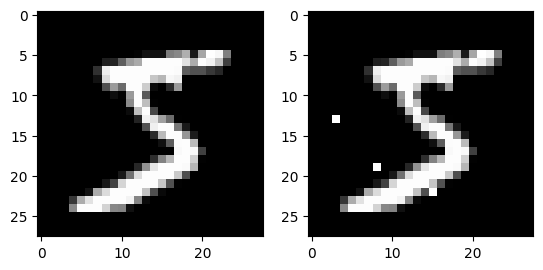

In [88]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

plt.subplot(1,2,1)

plt.imshow(x_train[0], cmap='gray', interpolation='none')
add_interferences(x_train)

plt.subplot(1,2,2)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
        


In [89]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [90]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [91]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 49)                38465     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         39200     
                                                                 
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [92]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2684 - val_loss: 0.1739
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1707 - val_loss: 0.1386
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1449 - val_loss: 0.1196
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1299 - val_loss: 0.1082
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1201 - val_loss: 0.1010
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1135 - val_loss: 0.0944
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1088 - val_loss: 0.0908
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1055 - val_loss: 0.0878
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1032 - val_loss: 0.0858
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1016 - val_loss: 0.0842

In [93]:
%matplotlib inline
import seaborn as sns

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [94]:
n = 10

imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

1/1 [==============================] - 0s 26ms/step


array([ 7.238367  ,  3.7282076 ,  4.854442  ,  3.7867923 ,  2.865306  ,
        4.6598644 ,  6.5880938 ,  7.377777  ,  6.4710097 ,  4.102891  ,
        6.693818  ,  0.88350856,  5.764081  ,  1.9087238 ,  6.4403477 ,
        3.044235  ,  7.0343375 ,  4.5374503 ,  3.8749287 ,  0.        ,
        5.8428974 ,  4.171557  ,  3.7261934 ,  4.095519  ,  6.136577  ,
        2.2894201 ,  5.804309  ,  2.4368448 ,  4.5832076 ,  3.9017963 ,
        1.6743369 ,  5.0755754 ,  7.059978  ,  4.9498634 , 11.411406  ,
        0.51949286,  5.744428  ,  7.2735662 ,  1.7238017 ,  7.2456007 ,
        4.0492067 ,  3.8340433 ,  4.6405106 ,  4.9563985 ,  4.874728  ,
        1.8429015 ,  2.094497  ,  4.3224716 ,  8.649932  ], dtype=float32)

1/1 [==============================] - 0s 27ms/step


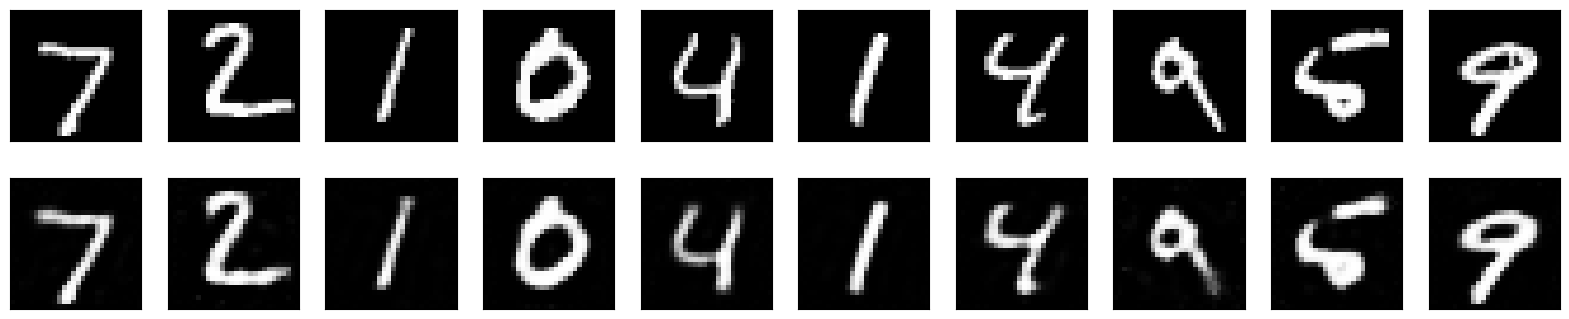

In [95]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

Глубокий автоэнкодер

In [96]:
def create_deep_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear')(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [97]:
d_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 49)                134750    
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         135485    
                                                                 
Total params: 270,235
Trainable params: 270,235
Non-trainable params: 0
_________________________________________________________________


In [98]:
d_autoencoder.fit(x_train, x_train,
                  epochs=100,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2333 - val_loss: 0.1448
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1481 - val_loss: 0.1193
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1329 - val_loss: 0.1092
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1240 - val_loss: 0.1030
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1187 - val_loss: 0.0979
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1154 - val_loss: 0.0958
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1132 - val_loss: 0.0930
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1113 - val_loss: 0.0919
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1097 - val_loss: 0.0903
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1083 - val_lo

1/1 [==============================] - 0s 32ms/step


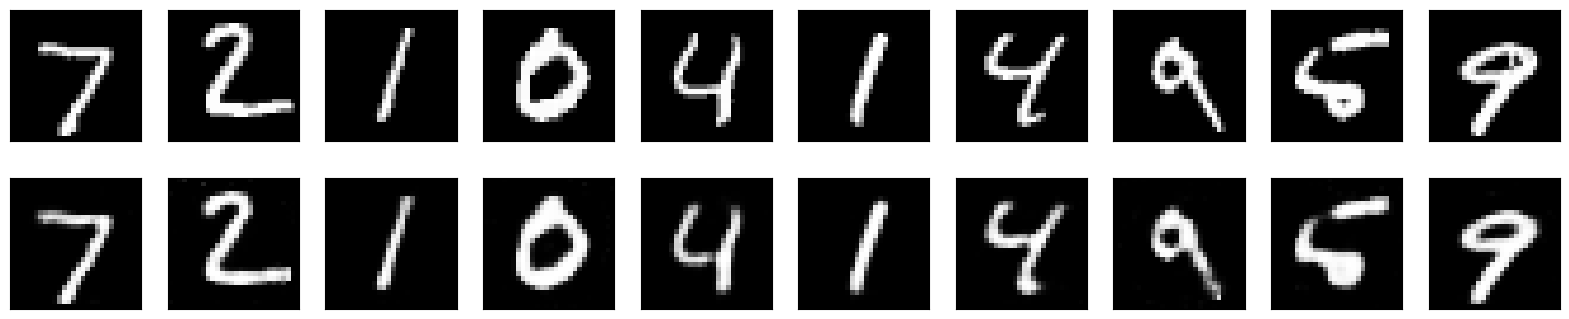

In [99]:
n = 10

imgs = x_test[:n]
encoded_imgs = d_encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

decoded_imgs = d_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

Сверточный автоэнкодер

In [100]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

def create_deep_conv_ae():
    input_img = Input(shape=(28, 28, 1))

    x = Conv2D(128, (7, 7), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(1, (7, 7), activation='relu', padding='same')(x)

    # На этом моменте представление  (7, 7, 1) т.е. 49-размерное

    input_encoded = Input(shape=(7, 7, 1))
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)

    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae()
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

c_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 7, 7, 1)           24385     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         24385     
                                                                 
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [101]:
c_autoencoder.fit(x_train, x_train,
                epochs=3,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/3
235/235 [==============================] - 400s 2s/step - loss: 0.2015 - val_loss: 0.1049
Epoch 2/3
235/235 [==============================] - 401s 2s/step - loss: 0.1160 - val_loss: 0.0931
Epoch 3/3
235/235 [==============================] - 404s 2s/step - loss: 0.1067 - val_loss: 0.0857


1/1 [==============================] - 0s 40ms/step


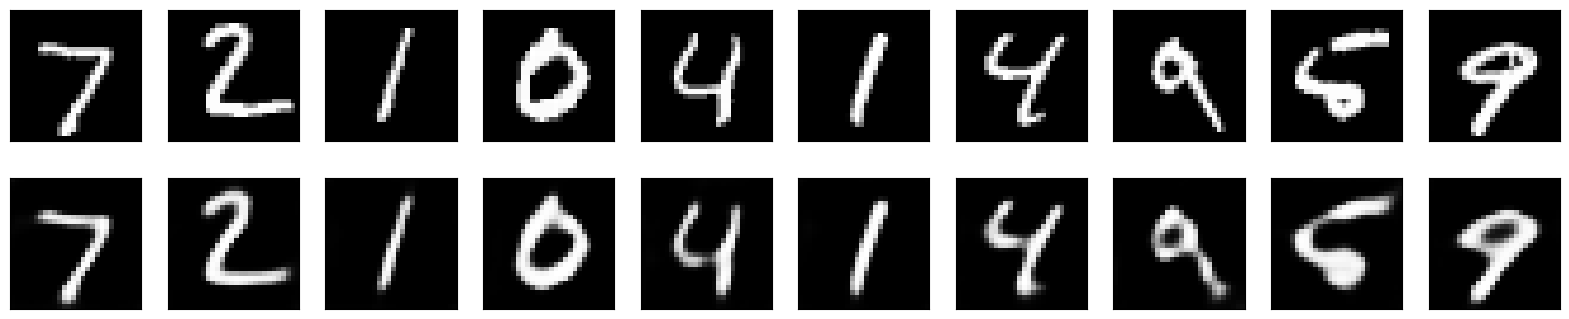

In [102]:
n = 10

imgs = x_test[:n]
encoded_imgs = c_encoder.predict(imgs, batch_size=n)
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

Denoising автоэнкодер

In [103]:
import keras.backend as K
from keras.layers import Lambda

batch_size = 16

def create_denoising_model(autoencoder):
    def add_noise(x):
        noise_factor = 0.5
        x = x + K.random_normal(x.get_shape(), 0.5, noise_factor)
        x = K.clip(x, 0., 1.)
        return x

    input_img  = Input(batch_shape=(batch_size, 28, 28, 1))
    noised_img = Lambda(add_noise)(input_img)

    noiser = Model(input_img, noised_img, name="noiser")
    denoiser_model = Model(input_img, autoencoder(noiser(input_img)), name="denoiser")
    return noiser, denoiser_model


noiser, denoiser_model = create_denoising_model(autoencoder)
denoiser_model.compile(optimizer='adam', loss='binary_crossentropy')

In [104]:
denoiser_model.fit(x_train, x_train,
                   epochs=200,
                   batch_size=batch_size,
                   shuffle=True,
                   validation_data=(x_test, x_test))

Epoch 1/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1623 - val_loss: 0.1336
Epoch 2/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1499 - val_loss: 0.1351
Epoch 3/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1487 - val_loss: 0.1301
Epoch 4/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1479 - val_loss: 0.1315
Epoch 5/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1474 - val_loss: 0.1296
Epoch 6/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1471 - val_loss: 0.1294
Epoch 7/200
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1468 - val_loss: 0.1289
Epoch 8/200
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1466 - val_loss: 0.1305
Epoch 9/200
3750/3750 [==============================] - 5s 1ms/step - loss: 0.1463 - val_loss: 0.1290
Epoch 10/200
3750/3750 [==============================] - 4s 1ms/step - l

1/1 [==============================] - 0s 9ms/step


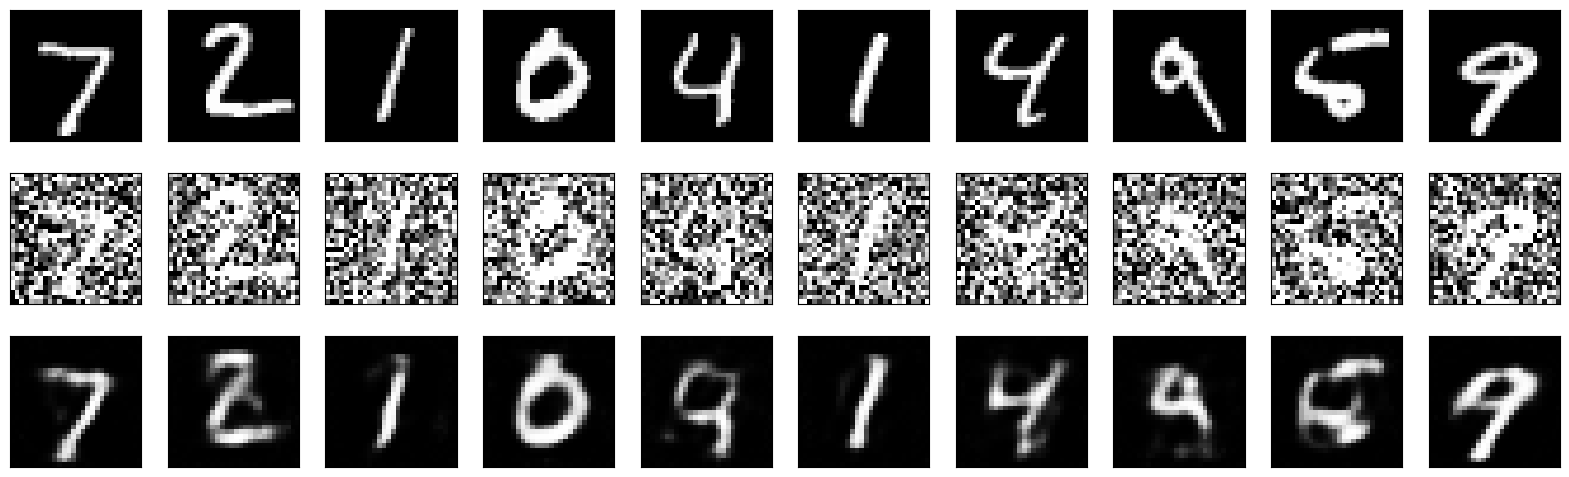

In [105]:
n = 10

imgs = x_test[:batch_size]
noised_imgs = noiser.predict(imgs, batch_size=batch_size)
encoded_imgs = encoder.predict(noised_imgs[:n],  batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs[:n], batch_size=n)

plot_digits(imgs[:n], noised_imgs, decoded_imgs)

Разреженный (Sparse) автоэнкодер

In [106]:
from keras.regularizers import L1L2

def create_sparse_ae():
    encoding_dim = 16
    lambda_l1 = 0.00001
    
    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear', activity_regularizer=L1L2(lambda_l1))(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

s_encoder, s_decoder, s_autoencoder = create_sparse_ae()
s_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [107]:
s_autoencoder.fit(x_train, x_train,
                epochs=400,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/400
235/235 [==============================] - 2s 4ms/step - loss: 0.2905 - val_loss: 0.2013
Epoch 2/400
235/235 [==============================] - 1s 4ms/step - loss: 0.1988 - val_loss: 0.1682
Epoch 3/400
235/235 [==============================] - 1s 4ms/step - loss: 0.1779 - val_loss: 0.1523
Epoch 4/400
235/235 [==============================] - 1s 4ms/step - loss: 0.1659 - val_loss: 0.1449
Epoch 5/400
235/235 [==============================] - 1s 4ms/step - loss: 0.1601 - val_loss: 0.1389
Epoch 6/400
235/235 [==============================] - 1s 4ms/step - loss: 0.1550 - val_loss: 0.1349
Epoch 7/400
235/235 [==============================] - 1s 4ms/step - loss: 0.1521 - val_loss: 0.1326
Epoch 8/400
235/235 [==============================] - 1s 3ms/step - loss: 0.1496 - val_loss: 0.1298
Epoch 9/400
235/235 [==============================] - 1s 4ms/step - loss: 0.1471 - val_loss: 0.1276
Epoch 10/400
235/235 [==============================] - 1s 4ms/step - loss: 0.1451 - val_lo

In [108]:
n = 10

imgs = x_test[:n]
encoded_imgs = s_encoder.predict(imgs, batch_size=n)
encoded_imgs[1]

1/1 [==============================] - 0s 36ms/step


array([ 1.5436594 ,  1.9688889 , -1.7614942 , -3.1304705 ,  1.2461329 ,
       -0.8826829 , -0.76228964,  0.5784738 ,  2.397343  , -0.33693373,
       -0.51209784,  1.2937542 ,  5.1237817 , -1.6068739 ,  0.42565316,
        0.8800943 ], dtype=float32)

1/1 [==============================] - 0s 34ms/step


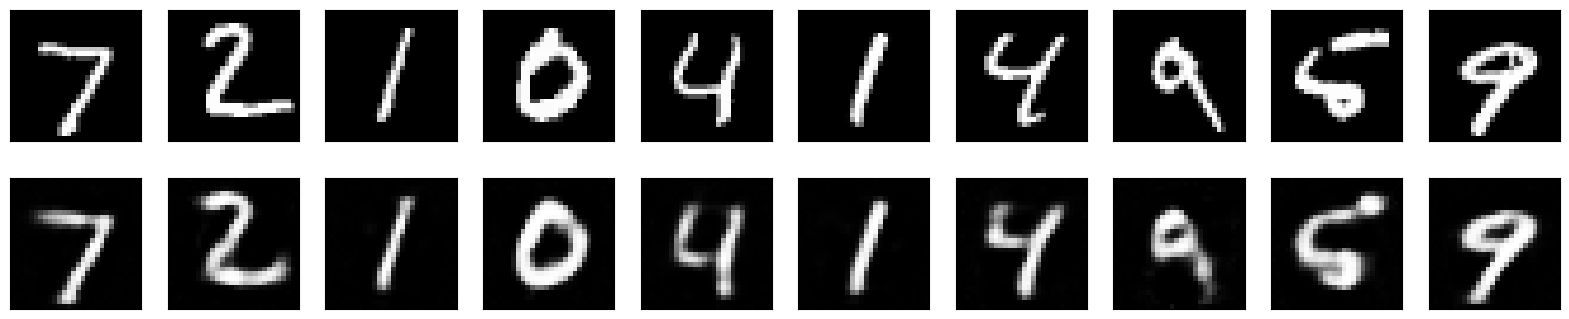

In [109]:
decoded_imgs = s_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)


1/1 [==============================] - 0s 36ms/step


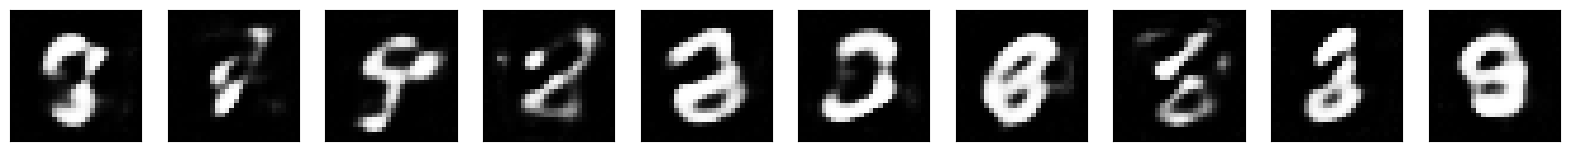

In [110]:
imgs = x_test
encoded_imgs = s_encoder.predict(imgs, batch_size=16)
codes = np.vstack([encoded_imgs.mean(axis=0)]*10)
np.fill_diagonal(codes, encoded_imgs.max(axis=0))

decoded_features = s_decoder.predict(codes, batch_size=16)
plot_digits(decoded_features)
